# Guided Project: Investigating Fandango Movie Ratings

This project will investigate Fandango movie rating system. we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis in 2015 presented here https://fivethirtyeight.com/features/fandango-movies-ratings/.

We will be using two data sets for this project
1. fandango comparison - this was used by Walt Hickey in 2015 analysis
2. A movie rating dataset aggregated for movies in 2016/2017 by a dataquest team member

And our goal is to  determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
fandango_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [26]:
# Isolate fandango ratings to a new data 
fandango_hick = fandango_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference' ]]
fandango_dq = movie_ratings[['movie', 'year', 'fandango']]

In [27]:
fandango_hick.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [28]:
fandango_dq.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


#### Data sampling methods
Since the Fandango_hick data contains movies released in 2015 with user reviews above 30, and fandango_dq is for movies released in the year of 2016 and 2017 with no smapling method stated on the source github page. Both data may be sampled using different criteria.

#### Change goal of analysis
Therefore, modifying the goal of this project seems to be a good solution due to the data limitation. Hence the population of interest and sample data will be used as representative to determine change in fandango rating system. This is still a good proxy for the initial question.

**New goal:** Describe and compare Fandango ratings for reviewed movies in 2015 with Fandango ratings for reviewed movies released in 2016. 
Reviewed here means movies with fan ratings of 30 and above.

### Selecting data of interest

The fandango_dq dataset does not provide the number of ratings a movie have hence we cannot verify if a movie is considered reviewed or not.

On another project working with this same data. The author found this dataset to contain 90% of reviewed movies (movies with atleast 30 fan reviews) by sampling 10 random values and checking them on Fandango website.

*Selecting only the year 2015 from Hick's data and 2016 from dataquest data*

In [29]:
fandango_hick['year'] = fandango_hick['FILM'].str[-5:-1]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [30]:
#checking unique year in the data
fandango_hick['year'].unique()

array(['2015', '2014'], dtype=object)

In [31]:
# Extracting year of interest (2015)
fandango_hick_2015 = fandango_hick[fandango_hick['year'] == '2015']

In [32]:
# Checking new data
fandango_hick_2015['year'].unique()

array(['2015'], dtype=object)

In [33]:
# Selecting only the year 2016 
fandango_dq_2016 = fandango_dq[fandango_dq['year'] == 2016]

*Plotting the ratings*

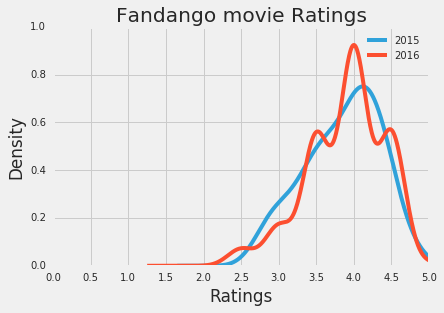

In [34]:
plt.style.use('fivethirtyeight')
fandango_hick_2015['Fandango_Ratingvalue'].plot.kde(label = '2015', legend = True, title = 'Fandango movie Ratings')
fandango_dq_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.xlabel('Ratings')
plt.xlim(0,5) 
plt.xticks(np.arange(0,5.1,.5))
plt.show()

From the plot above, we could see that both plots are skewed to the left. There is also a slight decrease in the ratings of movies in 2016, which might indicate correcting of the movie ratings displayed on the website or movies in 2016 were just rated lower in general. We might also want to compare the number of movies in each of the years.

In [35]:
print('2015 top ratings by percentage')
(fandango_hick_2015['Fandango_Ratingvalue'].value_counts(normalize = True).sort_values(ascending = False)* 100).head(10)

2015 top ratings by percentage


4.1    10.077519
3.9     9.302326
4.2     8.527132
4.3     6.976744
4.5     6.976744
3.6     6.201550
3.7     6.201550
4.0     5.426357
4.4     5.426357
3.4     5.426357
Name: Fandango_Ratingvalue, dtype: float64

In [36]:
print('2016 top ratings by percentage')
(fandango_dq_2016['fandango'].value_counts(normalize = True).sort_values(ascending = False)* 100).head(10)

2016 top ratings by percentage


4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots

### Investigating the mean, median and mode of this distributions

In [37]:
# Fandango 2015

print('mean: ', fandango_hick_2015['Fandango_Ratingvalue'].mean(),)
print('median: ', fandango_hick_2015['Fandango_Ratingvalue'].median(),)
print( 'mode: ', fandango_hick_2015['Fandango_Ratingvalue'].mode()[0])
summary2015 = [fandango_hick_2015['Fandango_Ratingvalue'].mean(),fandango_hick_2015['Fandango_Ratingvalue'].median(), fandango_hick_2015['Fandango_Ratingvalue'].mode()[0] ]

mean:  3.8465116279069766
median:  3.9
mode:  4.1


In [38]:
# Fandango 2016
print('mean: ', fandango_dq_2016['fandango'].mean(),)
print('median: ', fandango_dq_2016['fandango'].median(),)
print( 'mode: ', fandango_dq_2016['fandango'].mode()[0])
summary2016 = [fandango_dq_2016['fandango'].mean(), fandango_dq_2016['fandango'].median(), fandango_dq_2016['fandango'].mode()[0]]

mean:  3.887434554973822
median:  4.0
mode:  4.0


*These values show striking similarity between both distributions. Lets proceed to plot this statistics* 

In [39]:
df = pd.DataFrame(
    {'Rating2015': summary2015,
     'Rating2016': summary2016,
    })
df.index = ['mean', 'median', 'mode']

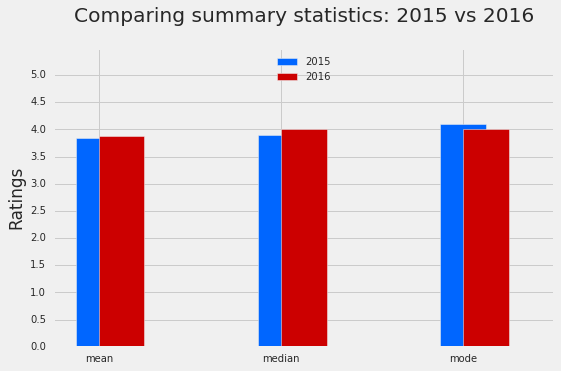

In [40]:


plt.style.use('fivethirtyeight')
df['Rating2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
df['Rating2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Ratings')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()



### Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

Also we are not sure of what caused this slight difference, but a good hypothesis might be that Fandango fixed it's rating system after Hickey's analysis